# Milestone 2

In [1]:
# imports 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from scripts import *

### I. Data Prepration

In [2]:
# Read the data
data_path = './data'  
images, labels = data_reader(data_path)

In [3]:
len(images)

455

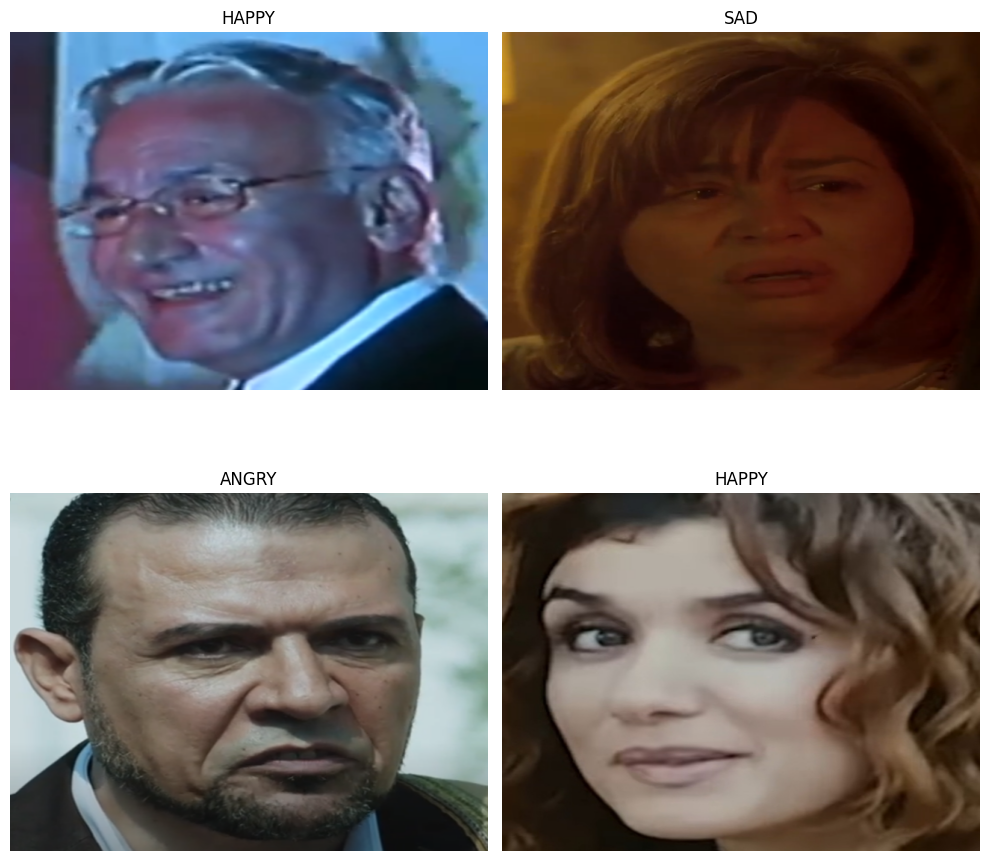

In [4]:
# View 4 random images and their titles
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(images))
    ax.imshow(images[idx])
    ax.set_title(labels[idx])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Preprocess the images 
train_tuple, val_tuple, test_tuple = data_preperator((images, labels))

train_data, train_labels = train_tuple
val_data, val_labels = val_tuple
test_data, test_labels = test_tuple

train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape

((318, 512, 512, 3),
 (318,),
 (91, 512, 512, 3),
 (91,),
 (46, 512, 512, 3),
 (46,))

### II.First Model

In [6]:
# Predefined filters
import numpy as np

base_a = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

base_b = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

base_c = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

base_d = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

base_e = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

filter_a = np.stack([base_a]*3, axis=-1)
filter_b = np.stack([base_b]*3, axis=-1)
filter_c = np.stack([base_c]*3, axis=-1)
filter_d = np.stack([base_d]*3, axis=-1)
filter_e = np.stack([base_e]*3, axis=-1)


filters = [filter_a, filter_b, filter_c, filter_d, filter_e]

In [7]:
# Testing ConvLayer with Random filters
conv_layer = ConvLayer(4, (3, 3, 3))

output = conv_layer.forward(train_data[0])
output.shape

(510, 510, 4)

In [8]:
# Visualize the output of the convolutional layer
conv_layer = ConvLayer(5, (3, 3, 3), filter_weights=filters)

output = conv_layer.forward(train_data[0])
output.shape

(510, 510, 5)

In [9]:
# Testing the pooling layer
pooling_layer = PoolingLayer(pooling_type='MAX', pool_size=(2, 2))

output = pooling_layer.forward(train_data[0])
output.shape

(256, 256, 3)

In [10]:
first_model = FirstModel()
first_model.fit(train_data, num_clusters=4)

  0%|          | 1/318 [00:09<48:53,  9.25s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  1%|          | 2/318 [00:18<49:05,  9.32s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  1%|          | 3/318 [00:28<49:33,  9.44s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  1%|▏         | 4/318 [00:37<49:31,  9.46s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  2%|▏         | 5/318 [00:47<49:27,  9.48s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  2%|▏         | 6/318 [00:56<48:51,  9.40s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  2%|▏         | 7/318 [01:05<48:39,  9.39s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  3%|▎         | 8/318 [01:15<48:12,  9.33s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  3%|▎         | 9/318 [01:24<47:52,  9.30s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  3%|▎         | 10/318 [01:33<47:41,  9.29s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  3%|▎         | 11/318 [01:42<47:27,  9.28s/it]

Flattened shape: (1, 19220)
Downsized shape: (1, 128)


  3%|▎         | 11/318 [01:48<50:27,  9.86s/it]


KeyboardInterrupt: 

### III. Second Model

In [11]:
# Test second_model is working
second_model = SecondModel()

example_image = torch.tensor(train_data[0], dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

output = second_model(example_image)

print("Output shape:", output.shape)
print("Output:", output)

Output shape: torch.Size([1, 4])
Output: tensor([[ 0.2095, -0.1322, -0.0074,  0.3538]], grad_fn=<AddmmBackward0>)


In [ ]:
train_loader = convert_to_dataloader(data=(train_data, train_labels), batch_size=32)
val_loader = convert_to_dataloader(data=(val_data, val_labels), batch_size=32)
test_loader = convert_to_dataloader(data=(test_data, test_labels), batch_size=32)



In [13]:
model = SecondModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20

training(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20], Train Loss: 1.2928, Train Acc: 0.3679, Val Loss: 1.4211, Val Acc: 0.2198
Epoch [2/20], Train Loss: 1.2101, Train Acc: 0.4748, Val Loss: 1.3640, Val Acc: 0.3626
Epoch [3/20], Train Loss: 1.1231, Train Acc: 0.5535, Val Loss: 1.4155, Val Acc: 0.3407
Epoch [4/20], Train Loss: 1.0480, Train Acc: 0.6132, Val Loss: 1.2335, Val Acc: 0.4396
Epoch [5/20], Train Loss: 0.9952, Train Acc: 0.6478, Val Loss: 1.2884, Val Acc: 0.3956
Epoch [6/20], Train Loss: 0.9380, Train Acc: 0.7013, Val Loss: 1.2716, Val Acc: 0.3956
Epoch [7/20], Train Loss: 0.9034, Train Acc: 0.6855, Val Loss: 1.1622, Val Acc: 0.5055
Epoch [8/20], Train Loss: 0.8440, Train Acc: 0.7358, Val Loss: 1.1227, Val Acc: 0.5385
Epoch [9/20], Train Loss: 0.7790, Train Acc: 0.7767, Val Loss: 1.1142, Val Acc: 0.5165
Epoch [10/20], Train Loss: 0.7007, Train Acc: 0.8459, Val Loss: 1.1244, Val Acc: 0.5604
Epoch [11/20], Train Loss: 0.6463, Train Acc: 0.8428, Val Loss: 1.1518, Val Acc: 0.4835
Epoch [12/20], Train Loss: 0.5696, Train 

#### Using augmentation

In [16]:
train_loader_augmented = convert_to_dataloader(data=(train_data, train_labels), batch_size=32, use_aug=True)

In [14]:
model = SecondModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20

training(model, train_loader_augmented, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20], Train Loss: 1.4322, Train Acc: 0.2767, Val Loss: 1.4265, Val Acc: 0.2637
Epoch [2/20], Train Loss: 1.2934, Train Acc: 0.3962, Val Loss: 1.3810, Val Acc: 0.2747
Epoch [3/20], Train Loss: 1.2164, Train Acc: 0.4780, Val Loss: 1.3028, Val Acc: 0.4176
Epoch [4/20], Train Loss: 1.1792, Train Acc: 0.5189, Val Loss: 1.3423, Val Acc: 0.3187
Epoch [5/20], Train Loss: 1.1215, Train Acc: 0.5912, Val Loss: 1.3124, Val Acc: 0.3516
Epoch [6/20], Train Loss: 1.0348, Train Acc: 0.6604, Val Loss: 1.2998, Val Acc: 0.3626
Epoch [7/20], Train Loss: 0.9721, Train Acc: 0.6730, Val Loss: 1.3184, Val Acc: 0.4066
Epoch [8/20], Train Loss: 0.8985, Train Acc: 0.7453, Val Loss: 1.3050, Val Acc: 0.3956
Epoch [9/20], Train Loss: 0.8480, Train Acc: 0.7642, Val Loss: 1.3555, Val Acc: 0.3626
Epoch [10/20], Train Loss: 0.7885, Train Acc: 0.7830, Val Loss: 1.3054, Val Acc: 0.4176
Epoch [11/20], Train Loss: 0.7370, Train Acc: 0.8145, Val Loss: 1.3202, Val Acc: 0.3956
Epoch [12/20], Train Loss: 0.6603, Train 

### Pretrained Model

#### ResNet18

In [ ]:
import torchvision.models as models
from torch import nn
from torchvision import transforms

model = get_pretrained_model(model_name="resnet18", num_classes=5)

# Resize and normalize the images for pretrained models like ResNet
transform = transforms.Compose([
    transforms.ToPILImage(),  
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_loader_pretrained = convert_to_dataloader(data=(train_data, train_labels), batch_size=32, transform=transform)
val_loader_pretrained = convert_to_dataloader(data=(val_data, val_labels), batch_size=32, transform=transform)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50
training(model, train_loader_pretrained, val_loader_pretrained, criterion, optimizer, num_epochs)



c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/50], Train Loss: 1.6257, Train Acc: 0.2044, Val Loss: 1.3824, Val Acc: 0.2857
Epoch [2/50], Train Loss: 1.3477, Train Acc: 0.3711, Val Loss: 1.3547, Val Acc: 0.3516
Epoch [3/50], Train Loss: 1.2286, Train Acc: 0.4497, Val Loss: 1.2462, Val Acc: 0.4066
Epoch [4/50], Train Loss: 1.1361, Train Acc: 0.5535, Val Loss: 1.2117, Val Acc: 0.5055
Epoch [5/50], Train Loss: 1.0390, Train Acc: 0.6478, Val Loss: 1.1429, Val Acc: 0.5385
Epoch [6/50], Train Loss: 0.9799, Train Acc: 0.6352, Val Loss: 1.1283, Val Acc: 0.5165
Epoch [7/50], Train Loss: 0.9516, Train Acc: 0.6572, Val Loss: 1.0929, Val Acc: 0.5275
Epoch [8/50], Train Loss: 0.8978, Train Acc: 0.6981, Val Loss: 1.0478, Val Acc: 0.5714
Epoch [9/50], Train Loss: 0.8752, Train Acc: 0.6855, Val Loss: 1.0364, Val Acc: 0.5385
Epoch [10/50], Train Loss: 0.8281, Train Acc: 0.7296, Val Loss: 1.0047, Val Acc: 0.5824
Epoch [11/50], Train Loss: 0.7895, Train Acc: 0.7421, Val Loss: 1.0054, Val Acc: 0.5604
Epoch [12/50], Train Loss: 0.7366, Train 